## Question 1

In [41]:
from IPython.display import IFrame
IFrame("BayesHW1Q1.pdf", width=600, height=300)

## Question 3

In [1]:
from sympy import symbols, Eq, solve
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import beta

a, b = symbols('a b')

n = [2, 10, 50, 100]
m = [0.25, 0.5, 0.75, 0.9]

A = [[]]*(len(n)*len(m))
B = [[]]*(len(n)*len(m))


ct = 0
for i in m:
    for ii in n:
        eq1 = Eq((i-1)*a + i*b,0)
        eq2 = Eq(a + b - ii,0)
        
        C = solve((eq1,eq2), (a, b))
        
        A[ct] = C.get(a)
        B[ct] = C.get(b)
        
        ct = ct + 1
        

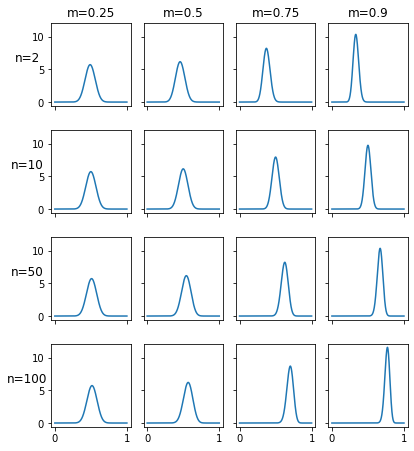

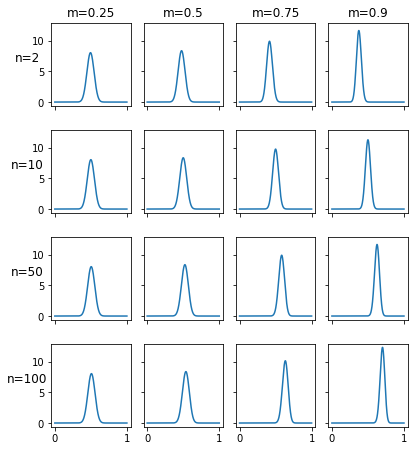

In [2]:
def plot_prior_post(X,N,A,B):
    
    cols = ['m={}'.format(col) for col in m ]
    rows = ['n={}'.format(row) for row in n]
    

    
    fig, axes = plt.subplots(4,4,sharex=True,sharey=True)
    ct = 0
    row = 0
    
    
    for i in range(len(A)):

        x = np.linspace(0, 1, 1000)
        fx = beta.pdf(x, float(A[i]), float(B[i]))
        prior = {'x': x, 'fx': fx}

        updated_a = A[i] + X
        updated_b = B[i] + N - X

        fxx = beta.pdf(x, float(updated_a), float(updated_b))
        posterior = {'x': x, 'fxx': fxx}


        #Plot prior and posterior
        if ct < 4: 
            #ax[row, ct].plot(prior['x'], prior['fx'])
            axes[row,ct].plot(posterior['x'], posterior['fxx'])
            
            ct = ct + 1
            
        else:
            ct = 0
            row = row + 1
            #ax[row, ct].plot(prior['x'], prior['fx'])
            axes[row,ct].plot(posterior['x'], posterior['fxx'])
            ct = ct + 1
            
    fig.tight_layout()
    fig.subplots_adjust(left=.15, top=1.5)
        
    for ax, col in zip(axes[0], cols):
        ax.set_title(col)

    for axes, r in zip(axes[:,0], rows):
        axes.set_ylabel(r, rotation=0, size='large')

        
        
A = [round(float(item), 2) for item in A]
B = [round(float(item), 2) for item in B]
plot_prior_post(25,50,A,B)
plot_prior_post(50,100,A,B)

For the second data set with more observations the posterior converges to the mean faster. Also, if there are more data points in the prior it has a larger influence on the posterior.

## Question 3

In [ ]:
from IPython.display import IFrame
IFrame("BayesHW1Q1.pdf", width=600, height=300)

## Question 4

In [3]:
import pandas as pd

data = pd.read_csv('ArtHistBooks.csv')
df = data.drop('Purchase', axis=1)

def old_books(df,a_0,b_0):
    df[df > 1] = 1



    a_post_0 = [[]]*(df.shape[1])
    b_post_0 = [[]]*(df.shape[1])
    successes = df.sum()

    N = len(data)

    ct = 0

    for X in successes:
        a_post_0[ct] = a_0 + X
        b_post_0[ct] = b_0 + N - X

        ct = ct + 1

    theta_hat_0 = [[]]*(df.shape[1])

    for i in range(len(a_post_0)):
        theta_hat_0[i] = a_post_0[i] / (a_post_0[i] + b_post_0[i])

    book_types = ['A','H','C']
    column_names = ['Book Type','a_post','b_post','theta_post']
    vals = [book_types,a_post_0,b_post_0,theta_hat_0]
    return pd.DataFrame(dict(zip(column_names, vals)))

old_books(df,1,1)

,Book Type,a_post,b_post,theta_post
0,A,302,700,0.301397
1,H,544,458,0.542914
2,C,381,621,0.380240


In [4]:
old_books(df,1,100)

,Book Type,a_post,b_post,theta_post
0,A,302,799,0.274296
1,H,544,557,0.494096
2,C,381,720,0.346049


In [5]:
def new_book(data,a_0,b_0):

    cases = {0:{'A':1,'H':0,'C':0,'P':1},1:{'A':1,'H':1,'C':0,'P':1},2:{'A':1,'H':1,'C':1,'P':1},
             3:{'A':0,'H':1,'C':0,'P':1},4:{'A':0,'H':1,'C':1,'P':1},5:{'A':0,'H':0,'C':1,'P':1},
             6:{'A':1,'H':0,'C':1,'P':1},7:{'A':0,'H':0,'C':0,'P':1}}
    
    successes = [0]*len(cases)
    
    total_cases = [0]*len(cases)
    
    for i in range(0,8):
        for index, row in data.iterrows():
            case = cases.get(i)
            A = case.get('A') == row[0]
            H = case.get('H') == row[1]
            C = case.get('C') == row[2]
            P = case.get('P') == row[3]
            if A == True and H == True and C == True and P == True:
                successes[i] = successes[i] + 1
            if A == True and H == True and C == True:
                total_cases[i] = total_cases[i] + 1


    ct = 0
    
    a_post_0 = [[]]*(len(cases))
    b_post_0 = [[]]*(len(cases))

    for i in range(0,len(successes)):
        a_post_0[ct] = a_0 + successes[i]
        b_post_0[ct] = b_0 + total_cases[i] - successes[i]

        ct = ct + 1

    theta_hat_0 = [[]]*(len(cases))

    for i in range(len(a_post_0)):
        theta_hat_0[i] = a_post_0[i] / (a_post_0[i] + b_post_0[i])

    cases_list = list(cases.values())
    column_names = ['Case','a_post','b_post','theta_post']
    vals = [cases_list,a_post_0,b_post_0,theta_hat_0]
    return pd.DataFrame(dict(zip(column_names, vals)))

data[data > 1] = 1
new_book(data,1,1)

,Case,a_post,b_post,theta_post
0,"{'A': 1, 'H': 0, 'C': 0, 'P': 1}",13,65,0.166667
1,"{'A': 1, 'H': 1, 'C': 0, 'P': 1}",17,85,0.166667
2,"{'A': 1, 'H': 1, 'C': 1, 'P': 1}",27,46,0.369863
3,"{'A': 0, 'H': 1, 'C': 0, 'P': 1}",11,242,0.043478
4,"{'A': 0, 'H': 1, 'C': 1, 'P': 1}",15,108,0.121951
5,"{'A': 0, 'H': 0, 'C': 1, 'P': 1}",4,132,0.029412
6,"{'A': 1, 'H': 0, 'C': 1, 'P': 1}",5,51,0.089286
7,"{'A': 0, 'H': 0, 'C': 0, 'P': 1}",5,190,0.025641


In [6]:
new_book(data,1,100)

,Case,a_post,b_post,theta_post
0,"{'A': 1, 'H': 0, 'C': 0, 'P': 1}",13,164,0.073446
1,"{'A': 1, 'H': 1, 'C': 0, 'P': 1}",17,184,0.084577
2,"{'A': 1, 'H': 1, 'C': 1, 'P': 1}",27,145,0.156977
3,"{'A': 0, 'H': 1, 'C': 0, 'P': 1}",11,341,0.031250
4,"{'A': 0, 'H': 1, 'C': 1, 'P': 1}",15,207,0.067568
5,"{'A': 0, 'H': 0, 'C': 1, 'P': 1}",4,231,0.017021
6,"{'A': 1, 'H': 0, 'C': 1, 'P': 1}",5,150,0.032258
7,"{'A': 0, 'H': 0, 'C': 0, 'P': 1}",5,289,0.017007


Increasing beta prior decreased the likeilhood for all situtions as expected

## Question 5

In [29]:
chd_data = pd.read_csv('CHDdata.csv')
chd_data = chd_data.drop(['famhist'], axis=1)

for column in chd_data:
    if column != 'chd':
        chd_data[column] = (chd_data[column] - chd_data[column].mean()) / chd_data[column].std()
        
chd_data_1 = chd_data[chd_data['chd']==1].drop('chd', axis=1).reset_index(drop=True)

chd_data_0 = chd_data[chd_data['chd']==0].drop('chd', axis=1).reset_index(drop=True)


mu_0 = np.transpose(np.zeros(8))
v = 1
a_prior = 9
dim = (8,8)
r_prior = np.identity(8)

N_1 = len(chd_data_1)
N_0 = len(chd_data_0)

x_bar1 = np.matrix(chd_data_1.mean().values)
x_bar1 = x_bar1.T
x_bar0 = np.matrix(chd_data_0.mean().values)
x_bar0 = x_bar0.T

mu_post_1 = ((v*mu_0) + (N_1*chd_data_1.mean().values)) / (v + N_1)
dof_1 = a_prior + N_1 - 8 + 1 

mu_post_0 = ((v*mu_0) + (N_0*chd_data_0.mean().values)) / (v + N_0)
dof_0 = a_prior + N_0 - 8 + 1 


S_1 = np.zeros(dim)
for index, row in chd_data_1.iterrows():
    x_j = np.matrix(chd_data_1.iloc[index].values)
    j_bar = x_j.T - x_bar1
    S_temp = np.dot(j_bar, np.transpose(j_bar))
    S_1 = S_1 + S_temp

S_0 = np.zeros(dim)
for index, row in chd_data_0.iterrows():
    x_j = np.matrix(chd_data_0.iloc[index].values)
    j_bar = x_j.T - x_bar0
    S_temp = np.dot(j_bar, np.transpose(j_bar))
    S_0 = S_0 + S_temp   


r_post_1 = r_prior + S_1 + ((v * N_1) / (v + N_1)) * np.outer((mu_0.T - x_bar1.T),(mu_0.T - x_bar1.T))
r_post_0 = r_prior + S_0 + ((v * N_0) / (v + N_0)) * np.outer((mu_0.T - x_bar0.T),(mu_0.T - x_bar0.T))

percision_1 = (v+N_1)*dof*np.linalg.pinv(r_post_1)
percision_0 = (v+N_0)*dof*np.linalg.pinv(r_post_0)

D = np.matrix(abs(mu_post_0 - mu_post_1))
D = D.T

const = (1/N_0) + (1/N_1)
top = ((N_0 - 1)*np.linalg.pinv(r_post_0)) + ((N_1 - 1) * np.linalg.pinv(r_post_1))
r_pooled = (const * top) / (N_0 + N_1 -2)



T_2 = np.transpose(D) * np.linalg.pinv(r_pooled) * D
print(T_2)

[[77262.62452068]]


matrix([[277.96155223]])

Since T^2 is large we will reject the null that the means are the same